In [2]:
import numpy  as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
dataset = pd.read_csv(r"C:\Users\ginus\Downloads\ANN_Churn_Modelling.csv")
X= dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [4]:
#Create dummy variables
geography = pd.get_dummies(X['Geography'],drop_first=False) 
gender = pd.get_dummies(X['Gender'],drop_first=False)

In [5]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)
## Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 0)

In [7]:
# Feature Scaling
from sklearn. preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform (X_train)
X_test=sc.transform(X_test)

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU, ELU
from keras.layers import Dropout
from keras.src import initializers

Epoch 1/100
1072/1072 [==============================] - 4s 2ms/step - loss: 0.5124 - accuracy: 0.7964 - val_loss: 0.4701 - val_accuracy: 0.7952
Epoch 2/100
1072/1072 [==============================] - 2s 2ms/step - loss: 0.4478 - accuracy: 0.8011 - val_loss: 0.4516 - val_accuracy: 0.7967
Epoch 3/100
1072/1072 [==============================] - 2s 2ms/step - loss: 0.4310 - accuracy: 0.8084 - val_loss: 0.4405 - val_accuracy: 0.8042
Epoch 4/100
1072/1072 [==============================] - 2s 2ms/step - loss: 0.4176 - accuracy: 0.8212 - val_loss: 0.4295 - val_accuracy: 0.8042
Epoch 5/100
1072/1072 [==============================] - 2s 2ms/step - loss: 0.4016 - accuracy: 0.8364 - val_loss: 0.4149 - val_accuracy: 0.8148
Epoch 6/100
1072/1072 [==============================] - 2s 2ms/step - loss: 0.3811 - accuracy: 0.8474 - val_loss: 0.3945 - val_accuracy: 0.8273
Epoch 7/100
1072/1072 [==============================] - 2s 2ms/step - loss: 0.3618 - accuracy: 0.8526 - val_loss: 0.3819 - val_ac

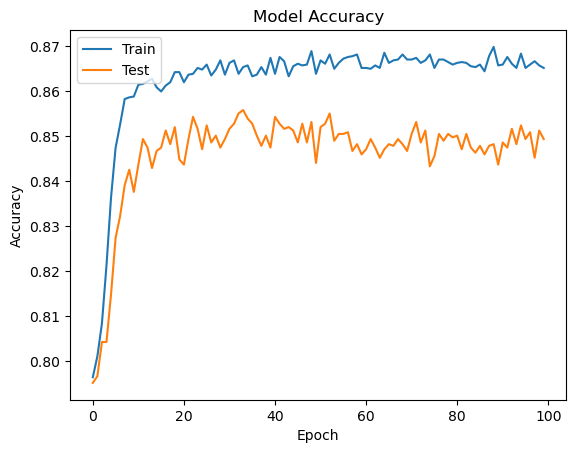

In [32]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Initializing the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=13))

# Adding the second hidden layer
classifier.add(Dense(units=7, kernel_initializer='he_uniform', activation='relu'))

# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='he_uniform', activation='sigmoid'))#glorot_uniform,sigmoid

# Compiling the ANN
classifier.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the training data
model_history = classifier.fit(X_train, y_train,validation_split=0.33, batch_size=5, epochs=100)

# List all data in history
print(model_history.history.keys())

# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [33]:
y_pred = classifier.predict(X_test) 
y_pred=(y_pred>0.5)

 1/63 [..............................] - ETA: 3s

63/63 [==============================] - 0s 1ms/step


In [34]:
#0.864
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix (y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score 
score= accuracy_score(y_pred,y_test)
print(score)

[[1537   58]
 [ 208  197]]
0.867
